In [1]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = 'https://www.consumercomplaints.in/reliance-jio-infocomm-b115543'
response = requests.get(url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.120 Safari/537.36'})

soup = BeautifulSoup(response.content, "lxml")

In [6]:
complaints = []
i=0
k = 0
while k < 172:
    url = 'https://www.consumercomplaints.in/reliance-jio-infocomm-b115543/page/' + str(i)
    response = requests.get(url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.120 Safari/537.36'})

    soup = BeautifulSoup(response.content, "lxml")
    listOfComplaints = soup.findAll('td', attrs = {'class': 'complaint'})
    for complaint in listOfComplaints:
        complaints.append(complaint.find('a').get_text())
        #print(complaints[i])
        #i = i + 1
        #print('---------------')
    i = i + 1
    k = k + 1
    #print(complaints)

In [9]:
#for c in complaints:
#    print(c)
#    print('-------------------')
actualComplaints = []
for c in complaints:
    c = c.replace('Reliance','')
    c = c.replace('Jio','')
    c = c.replace('Infocomm ','')
    actualComplaints.append(c)
    #print(c)
#print(actualComplaints)

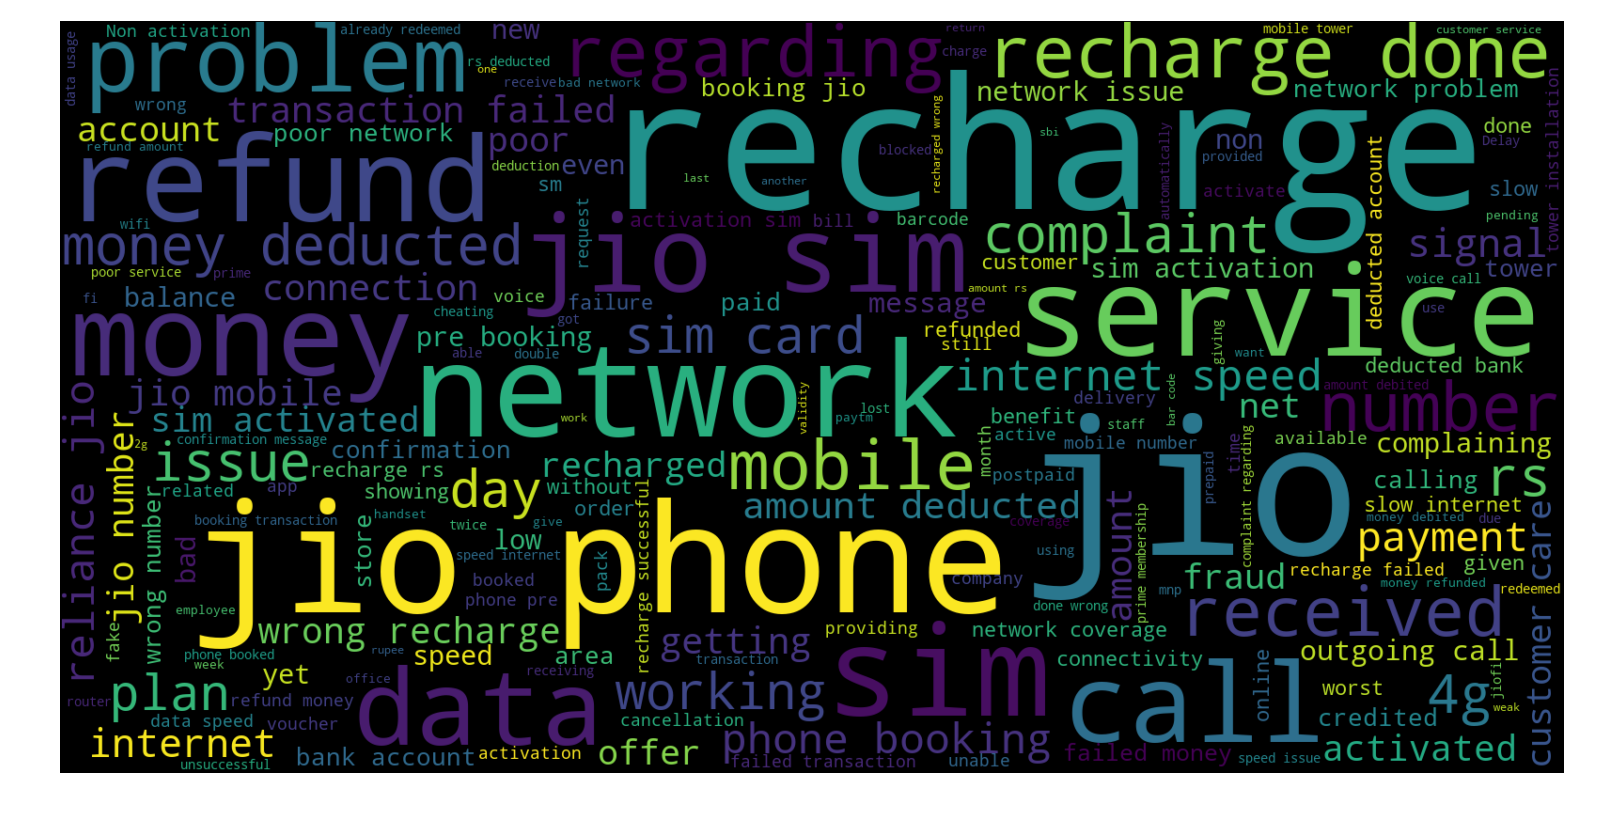

In [10]:
from wordcloud import WordCloud
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

complaint_string = []
for t in actualComplaints:
    complaint_string.append(t)
complaint_string = pd.Series(complaint_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(complaint_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()